In [1]:
import os
import numpy as np
import pickle
from tqdm import tqdm
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')
import numpy as np
import matplotlib as mpl
import gzip as gz
import sys
mpl.rcParams.update(mpl.rcParamsDefault)

width = 3.487 * 1.5 * 1.1
height = width / 1.618 * 1.2

plt.rc('font', family='sans-serif')#, serif='Times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
'text.usetex': True,
#'font.size': 15,
#'text.latex.unicode': True
}
plt.rcParams.update(params)

#fig, axes = plt.subplots(1, 1, figsize=(width, height))
#ax = axes
#ax.set_title('RefSeq assembly graph')

# colors = ['c', 'b', 'g', 'r']

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(10)
with open('/cluster/home/mikhaika/metagenome/data/coordinates_K/data/random_1M.fasta', 'w') as f:
    for i in range(1000000):
        kmer = ''.join(np.random.choice(['A', 'C', 'G', 'T'], 21))
        count = np.random.randint(1, 1000)
        f.write(f'>\n{kmer}\n' * count)

In [2]:
def get_size(fname):
    try:
        return os.path.getsize(fname)
    except:
        return np.nan

## PacBio HiFi Viruses reads

In [3]:
with open('gzip_spring_size.pkl', 'rb') as f:
    gzip, spring_size, gzip_size = pickle.load(f)

# gzip = !find ~/metagenome/data/hifi_sra/viruses_hifi_data/compressed -name "*_no_header.fasta.gz"

# spring_size = []
# gzip_size = []

# for x in tqdm(gzip):
#     gzip_size.append(get_size(x))
#     ID = x[:-len('_no_header.fasta.gz')]
#     spring_fname = f'{ID}_no_header.spring'
#     spring_size.append(get_size(spring_fname))

# spring_size = np.array(spring_size)
# gzip_size = np.array(gzip_size)

# with open('gzip_spring_size.pkl', 'wb') as f:
#     pickle.dump((gzip, spring_size, gzip_size), f)

In [4]:
with open('hifi_score_ratio.pkl', 'rb') as f:
    score_ratio = pickle.load(f)

# score_ratio = []

# for x in tqdm(gzip, mininterval=5):
#     ID = x[:-len('_no_header.fasta.gz')]
#     SRA = ID.split('/')[-1]
#     file = f'/cluster/home/mikhaika/metagenome/raw_data/hifi_sra/viruses_hifi_data/{SRA}/{SRA}.fastq.gz'
#     scores = ! zless $file | paste - - - - | cut -f4 | head -n 100
#     score_ratio.append(np.mean([s == '~' for s in ''.join(scores)]))

# score_ratio = np.array(score_ratio)
# with open('hifi_score_ratio.pkl', 'wb') as f:
#     pickle.dump(score_ratio, f)

In [5]:
with open('num_bp.pkl', 'rb') as f:
    num_bp = pickle.load(f)

# num_bp = []

# for x in tqdm(gzip, mininterval=5):
#     fname = x[:-len('_no_header.fasta.gz')] + '_num_bp'
#     with open(fname, 'r') as f:
#         n = int(f.readline())
#         num_bp.append(n)

# num_bp = np.array(num_bp)

# with open('num_bp.pkl', 'wb') as f:
#     pickle.dump(num_bp, f)

In [6]:
len(score_ratio)

152884

Now out of all 152,884 PacBio SMRT samples, we are going to select only the Hi-Fi ones.
This is not a property written in the metadata at NCBI SRA, so we're going to use the fact that for Hi-Fi sequencing, most of the sequencing scores are '\~'. Thus, we're going to look at the frequency of '\~' quality scores in each sample and filter out those samples for which this frequency is less than 0.7.

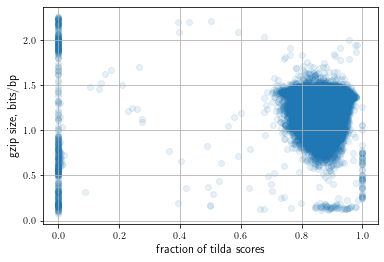

In [7]:
plt.scatter(score_ratio, (gzip_size * 8 / num_bp), alpha=0.1)
plt.xlabel('fraction of tilda scores')
plt.ylabel('gzip size, bits/bp')
plt.grid()
plt.show()

The fraction of libraries we keep:

In [8]:
print(f'{np.mean(score_ratio > 0.7) * 100:.2f}%')

99.70%


As we can see, only 0.3% of samples were discarded by this criterion:

In [9]:
print(np.concatenate((np.array([x.split('/')[-1][:-len('_no_header.fasta.gz')] for x in gzip])[score_ratio <= 0.7].reshape(-1, 1), score_ratio[score_ratio <= 0.7].reshape(-1, 1)), axis=1))

[['SRR3474205' '0.0']
 ['SRR3474206' '0.0']
 ['SRR3474203' '0.0']
 ['SRR3474204' '0.0']
 ['SRR2041922' '0.0']
 ['SRR2042468' '0.0']
 ['SRR7892517' '0.0']
 ['SRR528818' '0.0']
 ['SRR528803' '0.012313836425659372']
 ['SRR528788' '4.7216582463761274e-05']
 ['SRR528812' '0.000330531683822835']
 ['SRR528819' '8.756567425569177e-05']
 ['SRR528843' '0.0']
 ['SRR528777' '0.004063148093283109']
 ['SRR528808' '0.0']
 ['SRR528796' '0.0']
 ['SRR528798' '0.0003410932037179159']
 ['SRR528838' '0.0004110903028365231']
 ['SRR528842' '0.0018848700967906266']
 ['SRR528846' '4.169967891247237e-05']
 ['SRR528831' '0.0']
 ['SRR528826' '0.0']
 ['SRR528837' '0.0']
 ['SRR528833' '0.0']
 ['SRR528850' '4.5724737082761774e-05']
 ['SRR528851' '0.004765943697241407']
 ['SRR528834' '0.0']
 ['SRR528840' '0.005685971895053204']
 ['SRR528802' '0.006106529975484734']
 ['SRR528828' '0.013454861111111112']
 ['SRR528852' '0.003726272412432598']
 ['SRR528835' '0.00021592675764380722']
 ['SRR528773' '0.0']
 ['SRR528774' '0.

In [10]:
idx = score_ratio > 0.7
gzip = np.array(gzip)[idx]
gzip_size = gzip_size[idx]
num_bp = num_bp[idx]
spring_size = spring_size[idx]

In [11]:
with open('mtg_size.pkl', 'rb') as f:
    mtg_size = pickle.load(f)[idx]

# mtg_size = []

# DIR = !echo $PWD
# DIR = f'{DIR[0]}/metagenome/data/hifi_sra/viruses_hifi_data/mtg'

# for x in gzip:
#     ID = x.split('/')[-1][:-len('_no_header.fasta.gz')]
#     graph_size = get_size(f'{DIR}/{ID[:6]}/{ID}/graph_small.dbg')
#     anno_size = get_size(f'{DIR}/{ID[:6]}/{ID}/annotation.row_diff_coord.annodbg')
#     mtg_size.append(graph_size + anno_size)

# mtg_size = np.array(mtg_size)

# with open('mtg_size.pkl', 'wb') as f:
#     pickle.dump(mtg_size, f)

In [12]:
with open('blast_size.pkl', 'rb') as f:
    blast_size = pickle.load(f)[idx]

# from pathlib import Path

# blast_size = []

# DIR = !echo $PWD
# DIR = f'{DIR[0]}/metagenome/data/hifi_sra/viruses_hifi_data/blast'

# for x in tqdm(gzip):
#     ID = x.split('/')[-1][:-len('_no_header.fasta.gz')]
#     blast_size.append(sum(f.stat().st_size for f in Path(f'{DIR}/{ID[:6]}/{ID}').glob('*') if f.is_file()))

# blast_size = np.array(blast_size)

# with open('blast_size.pkl', 'wb') as f:
#     pickle.dump(blast_size, f)

In [13]:
with open('mgblst_size.pkl', 'rb') as f:
    mgblst_size = pickle.load(f)[idx]

# from pathlib import Path

# mgblst_size = []

# DIR = !echo $PWD
# DIR = f'{DIR[0]}/metagenome/data/hifi_sra/viruses_hifi_data/megablast'

# for x in tqdm(gzip, mininterval=5):
#     ID = x.split('/')[-1][:-len('_no_header.fasta.gz')]
#     mgblst_size.append(sum(f.stat().st_size for f in Path(f'{DIR}/{ID[:6]}/{ID}').glob('*') if f.is_file()))

# mgblst_size = np.array(mgblst_size) + blast_size

# with open('mgblst_size.pkl', 'wb') as f:
#     pickle.dump(mgblst_size, f)

In [14]:
sum(gzip_size) / 1e9

111.599186766

In [15]:
sum(num_bp) / 1e9

716.726703751

In [16]:
print(f"MegaBLAST compression: {sum(num_bp) / sum(mgblst_size - blast_size):.1f}")
print(f"BLAST compression: {sum(num_bp) / sum(blast_size):.1f}")
print(f"gzip -9 compression: {sum(num_bp) / sum(gzip_size):.1f}")
print(f"mtg compression: {sum(num_bp) / sum(mtg_size):.1f}")
print(f"Spring compression: {sum(num_bp) / sum(spring_size):.1f}")

MegaBLAST compression: 0.1
BLAST compression: 3.0
gzip -9 compression: 6.4
mtg compression: 14.7
Spring compression: 38.4


In [17]:
print(f"MegaBLAST bits/bp: {sum(mgblst_size - blast_size) * 8 / sum(num_bp):.3f}")
print(f"BLAST bits/bp: {sum(blast_size) * 8 / sum(num_bp):.3f}")
print(f"gzip -9 bits/bp: {sum(gzip_size) * 8 / sum(num_bp):.3f}")
print(f"mtg bits/bp: {sum(mtg_size) * 8 / sum(num_bp):.3f}")
print(f"Spring bits/bp: {sum(spring_size) * 8 / sum(num_bp):.3f}")

MegaBLAST bits/bp: 125.848
BLAST bits/bp: 2.678
gzip -9 bits/bp: 1.246
mtg bits/bp: 0.544
Spring bits/bp: 0.208


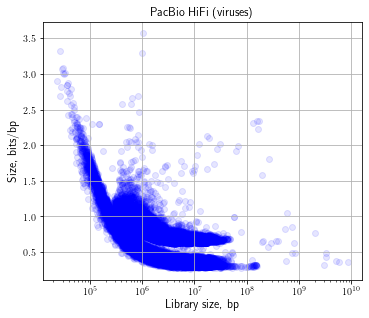

In [18]:
width = 3.487 * 1.5 * 1
height = width / 1.618 * 1.4

x = np.array(num_bp)
y = np.array(mtg_size * 8 / num_bp)
plt.figure(figsize=(width, height))
plt.scatter(x, y, color='b', alpha=0.1)

plt.title('PacBio HiFi (viruses)')
plt.ylabel('Size, bits/bp')
plt.xlabel('Library size, bp')
plt.grid()
plt.xscale('log')
plt.tight_layout()
plt.savefig('hifi_size_vs_numbp.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [19]:
# adapted from https://gist.github.com/jquacinella/1a6341f0f1446973714c
import weighted  # install with 'pip install wquantiles'
from matplotlib.cbook import violin_stats
from scipy import stats
from scipy.stats import gaussian_kde


def vdensity_with_weights(weights):
    ''' Outer function allows innder function access to weights. Matplotlib
    needs function to take in data and coords, so this seems like only way
    to 'pass' custom density function a set of weights '''

    def vdensity(data, coords):
        ''' Custom matplotlib weighted violin stats function '''
        # Using weights from closure, get KDE fomr statsmodels
        weighted_cost = gaussian_kde(data, weights=weights)

        # Return y-values for graph of KDE by evaluating on coords
        return weighted_cost.evaluate(coords)
    return vdensity

def custom_violin(data, weights, ax, positions=None, drop_outliers=False, **kwargs):
    results = []

    for i, (x, w) in enumerate(zip(data, weights)):
        idx = np.ones(x.shape, dtype=bool)
        if drop_outliers:
            q1 = weighted.quantile_1D(x, w, 0.25)
            q3 = weighted.quantile_1D(x, w, 0.75)
            iqr = q3 - q1  # Interquartile range
            fence_low = q1 - (1.5 * iqr)
            fence_high = q3 + (1.5 * iqr)
            idx = (x > fence_low) & (x < fence_high)

        # Use matplotlib violin_stats, which expects a function that takes in data and coords
        # which we get from closure above
        results.append(violin_stats(np.array(x)[idx], vdensity_with_weights(np.array(w)[idx].astype(float)))[0])

        # Get weighted median and mean (using weighted module for median)
        median = weighted.quantile_1D(x, w, 0.5)
        mean, sumw = np.ma.average(x, weights=w, returned=True)

        # Update result dictionary with our updated info
        results[i][u"mean"] = mean
        results[i][u"median"] = median

        # No need to do this, since it should be populated from violin_stats
        # results[i][u"min"] =  np.min(x)
        # results[i][u"max"] =  np.max(x)
        if 'vert' in kwargs.keys() and kwargs['vert']:
            ax.scatter(positions[i] * np.ones(x[~idx].shape), x[~idx],
                       marker='o', linewidth=0.3, edgecolor='black', color='white', s=3, zorder=3)
        else:
            ax.scatter(x[~idx], positions[i] * np.ones(x[~idx].shape),
                       marker='o', linewidth=0.3, edgecolor='black', color='white', s=3, zorder=3)

    parts = ax.violin(results, positions=positions, widths=0.6, **kwargs)
    for partname in ('cmeans',):
        parts[partname].set_colors('black')
    return parts

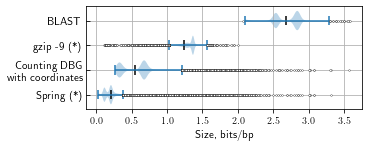

In [20]:
width = 3.487 * 1.5 * 1
height = width / 1.618 / 1.5

fig, ax = plt.subplots(figsize=(width, height))

violin_data = [
    8 * spring_size / num_bp,
    8 * mtg_size / num_bp,
    8 * gzip_size / num_bp,
    8 * blast_size / num_bp,
]
labels = ['Spring (*)',
          'Counting DBG\nwith coordinates',
          'gzip -9 (*)',
          'BLAST',]
violin_weights = [num_bp] * len(labels)
pos = np.arange(len(violin_data)) / 1.3
parts = custom_violin(violin_data, positions=pos, weights=violin_weights,
              vert=False, showmeans=True, ax=ax, drop_outliers=True)
#plt.violinplot(violin_data, vert=False, showmeans=True)

def set_axis_style(ax, labels):
    ax.yaxis.set_tick_params(direction='in')
    ax.yaxis.set_ticks_position('left')
    ax.set_yticks(pos)
    ax.set_yticklabels(labels, size=11)

set_axis_style(ax, labels)

#plt.axvline(1, color='black', alpha=0.5, linestyle='dashed', linewidth=2)

#plt.legend(fontsize=12)
plt.xlabel('Size, bits/bp', size=11)
plt.grid()
plt.tight_layout()
#plt.xlim([0, 15])
plt.savefig('hifi_compression_violin.pdf', format='pdf', bbox_inches='tight')
plt.show()

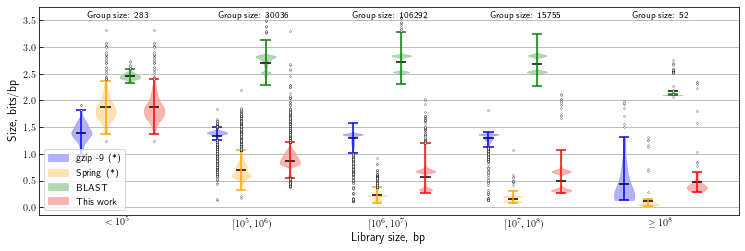

In [21]:
width = 3.487 * 1.5 * 2
height = width / 1.618 / 1.8

fig, ax = plt.subplots(figsize=(width, height))

colors = ['b', 'orange', 'green', 'red']
labels = ['gzip -9 (*)',
          'Spring (*)',
          'BLAST',
          'This work']

bs = [1e5, 1e6, 1e7, 1e8, np.inf]
num_points = []
for i in range(len(bs)):
    if i == 0:
        idx = num_bp < bs[0]
    elif i == len(bs) - 1:
        idx = num_bp > bs[-2]
    else:
        idx = (num_bp < bs[i]) & (num_bp >= bs[i - 1])
    num_points.append(sum(idx))

    violin_data = [gzip_size[idx] * 8 / num_bp[idx],
                   spring_size[idx] * 8 / num_bp[idx],
                   blast_size[idx] * 8 / num_bp[idx],
                   mtg_size[idx] * 8 / num_bp[idx]]
    violin_weights = [num_bp[idx],
                      num_bp[idx],
                      num_bp[idx],
                      num_bp[idx],]
    shift = len(violin_data)
    pos = np.arange(1, len(violin_data) + 1) / 1.4
    parts = custom_violin(violin_data, positions=shift*i + pos, weights=violin_weights,
                          vert=True, showmeans=True, ax=ax, drop_outliers=True)
#     parts = plt.violinplot(violin_data, positions=pos, vert=True, showmeans=True)
#     for j in range(len(violin_data)):
#         points = np.random.choice(violin_data[j], 10)
#         sns.swarmplot(x=np.ones((points.size,)) * (shift*i + pos[j]), y=points,
#                       color="black", edgecolor="gray", ax=ax)
    for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans'):
        parts[partname].set_colors(colors)
    for partname in ('cmeans',):
        parts[partname].set_colors('black')
#     ax.scatter(shift*i + pos, (np.array(violin_data) * np.array(violin_weights)).sum(1) / np.array(violin_weights).sum(1),
#                marker='o', color='black', s=30, zorder=3)
    for pc, c in zip(parts['bodies'], colors):
        pc.set_color(c)
        pc.set_alpha(0.3)
        pc.set_edgecolor(c)
        pc.set_linewidth(0.5)
    ax.text((shift*i + pos[0] + shift*i + pos[-1]) / 2, 3.54, f'Group size: {num_points[i]}',
            horizontalalignment='center', size=9)

ax.yaxis.set_tick_params(direction='in')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_tick_params(length=0)
#ax.xaxis.set_ticks_position('left')
#ax.set_yticks(pos)
ax.set_xticks([(shift*i + pos[0] + shift*i + pos[-1]) / 2 for i in range(len(bs))])
# ax.set_yticks(np.arange(1, len(labels) + 1))
def mult(x):
    return int(x / 10**int(np.log10(x)))
ax.set_xticklabels([f'$<10^{int(np.log10(bs[0]))}$'] +
                   [f'$[{f"{mult(bs[i-1])}{chr(92)}cdot " if mult(bs[i-1]) != 1 else ""}10^{int(np.log10(bs[i-1]))}, '
                    f'{f"{mult(bs[i])}{chr(92)}cdot " if mult(bs[i]) != 1 else ""}10^{int(np.log10(bs[i]))})$'
                    for i in range(1, len(bs)-1)] +
                   [f'$\geq 10^{int(np.log10(bs[-2]))}$'])
ax.xaxis.grid(True)
ax.legend(parts['bodies'], labels, loc='lower left')
#ax.set_ylim(0.25, len(labels) + 0.75)

#plt.axvline(1, color='black', alpha=0.5, linestyle='dashed', linewidth=2)

plt.ylabel('Size, bits/bp')
plt.xlabel('Library size, bp')
#plt.title('HiFi viruses')
plt.grid()
plt.tight_layout()
#plt.xlim([0, 15])
plt.savefig('hifi_compression_violin_groups.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Illumina RNA-Seq reads

In [22]:
with open('kingsford_gzip_spring.pkl', 'rb') as f:
    gzip, read_length, gzip_size, fasta_size, spring_size = pickle.load(f)

# gzip = !ls ~/metagenome/data/kingsford/compressed/*_no_header.fasta.gz

# read_length = []
# spring_size = []
# gzip_size = []
# fasta_size = []

# for x in tqdm(gzip, mininterval=1):
#     gzip_size.append(get_size(x))
#     fasta_size.append(get_size(x[:-len('.gz')]))
#     ID = x[:-len('_no_header.fasta.gz')]
#     spring_fname = f'{ID}_no_header.spring'
#     spring_size.append(get_size(spring_fname))
#     SRA = ID.split('/')[-1]
#     with gz.open(f'/cluster/home/mikhaika/metagenome/raw_data/kingsford/data_fasta/{SRA}.fasta.gz', 'r') as f:
#         L = int(str(f.readline().strip().decode().split('=')[-1]))
#         read_length.append(L)

# spring_size = np.array(spring_size)
# gzip_size = np.array(gzip_size)
# fasta_size = np.array(fasta_size)
# read_length = np.array(read_length)

# with open('kingsford_gzip_spring.pkl', 'wb') as f:
#     pickle.dump((gzip, read_length, gzip_size, fasta_size, spring_size), f)

In [23]:
with open('kingsford_num_bp.pkl', 'rb') as f:
    num_bp = pickle.load(f)

# num_bp = []

# for x in tqdm(gzip, mininterval=1):
#     fname = x[:-len('_no_header.fasta.gz')] + '.num_bp'
#     with open(fname, 'r') as f:
#         n = int(f.readline())
#         num_bp.append(n)

# num_bp = np.array(num_bp)

# with open('kingsford_num_bp.pkl', 'wb') as f:
#     pickle.dump(num_bp, f)

In [24]:
len(num_bp), sum(num_bp) / 1e12

(2652, 7.973392066664)

In [25]:
with open('kingsford_mtg_size.pkl', 'rb') as f:
    mtg_size = pickle.load(f)

# mtg_size = []

# DIR = !echo $PWD
# DIR = f'{DIR[0]}/metagenome/data/kingsford_31_coordinates/'

# for x in tqdm(gzip, mininterval=1):
#     ID = x.split('/')[-1][:-len('_no_header.fasta.gz')]
#     graph_size = get_size(f'{DIR}/{ID}.fasta.gz/graph_small.dbg')
#     graph_size += get_size(f'{DIR}/{ID}.fasta.gz/graph.dbg.rd_succ')
#     graph_size += get_size(f'{DIR}/{ID}.fasta.gz/graph.dbg.anchors')
#     column_fname = f'{DIR}/{ID}.fasta.gz/rd_columns/annotation.column.annodbg'
#     coords_fname = f'{DIR}/{ID}.fasta.gz/rd_columns/annotation.column.annodbg.coords'
#     mtg_size.append(graph_size + get_size(column_fname) + get_size(coords_fname))

# mtg_size = np.array(mtg_size)

# with open('kingsford_mtg_size.pkl', 'wb') as f:
#     pickle.dump(mtg_size, f)

In [26]:
with open('kingsford_mtg2_size.pkl', 'rb') as f:
    mtg2_size = pickle.load(f)

# mtg2_size = []

# DIR = !echo $PWD
# DIR = f'{DIR[0]}/metagenome/data/kingsford_31_coordinates_fork_opt/'

# for x in tqdm(gzip, mininterval=1):
#     ID = x.split('/')[-1][:-len('_no_header.fasta.gz')]
#     graph_size = get_size(f'{DIR}../kingsford_31_coordinates/{ID}.fasta.gz/graph_small.dbg')
#     graph_size += get_size(f'{DIR}/{ID}.fasta.gz/graph.dbg.rd_succ')
#     graph_size += get_size(f'{DIR}/{ID}.fasta.gz/graph.dbg.anchors')
#     column_fname = f'{DIR}/{ID}.fasta.gz/rd_columns/annotation.column.annodbg'
#     coords_fname = f'{DIR}/{ID}.fasta.gz/rd_columns/annotation.column.annodbg.coords'
#     mtg2_size.append(graph_size + get_size(column_fname) + get_size(coords_fname))

# mtg2_size = np.array(mtg2_size)

# with open('kingsford_mtg2_size.pkl', 'wb') as f:
#     pickle.dump(mtg2_size, f)

Counting de Bruijn graphs were constructed from all 2,498 libraries with reads of length at least 31.

In [27]:
#idx = (mtg2_size > 0) & (mtg_size > 0) & (spring_size > 0)
#idx = (mtg_size > 0) & (spring_size > 0)
idx = (mtg_size > 0)
sum(idx)

2498

Spring failed on some of the libraries because of unknown issues:

In [28]:
sum((mtg_size > 0) & (spring_size > 0))

2266

In [29]:
print(f"gzip -9 compression: {sum(num_bp[idx]) / sum(gzip_size[idx]):.1f}")
print(f"mtg compression: {sum(num_bp[idx]) / sum(mtg_size[idx]):.1f}")
print(f"Spring compression: {sum(num_bp[idx]) / sum(spring_size[idx]):.1f}")

gzip -9 compression: 3.8
mtg compression: 4.8
Spring compression: nan


In [30]:
print(f"gzip -9 bits/bp: {sum(gzip_size[idx]) * 8 / sum(num_bp[idx]):.1f}")
print(f"mtg bits/bp: {sum(mtg_size[idx]) * 8 / sum(num_bp[idx]):.1f}")
print(f"Spring bits/bp: {sum(spring_size[idx]) * 8 / sum(num_bp[idx]):.1f}")

gzip -9 bits/bp: 2.1
mtg bits/bp: 1.7
Spring bits/bp: nan


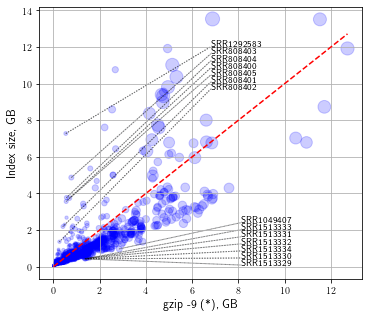

In [31]:
width = 3.487 * 1.5 * 1
height = width / 1.618 * 1.4

BYTES_IN_GB = 1e9

x = np.array(gzip_size[idx]) / BYTES_IN_GB
y = np.array(mtg_size[idx]) / BYTES_IN_GB
plt.figure(figsize=(width, height))
w = num_bp[idx]
plt.scatter(x, y, color='b', alpha=0.2, s=w / w.max() * 200)
#plt.scatter(x, y, color='b', alpha=0.3)
plt.plot([x.min(), x.max()], [x.min(), x.max()], ls="--", c='red')

i = (y / x)
i[w < 1e9] = 0
i = i.argsort()[::-1]
n_labels = 7
s = (y[i[:n_labels]] - x[i[:n_labels]]).argsort()
for p in range(n_labels):
    j = i[s[p]]
    start, end = 9.7e9 / BYTES_IN_GB, 12.4e9 / BYTES_IN_GB
    text_coord = 6.8e9 / BYTES_IN_GB, start + (end-start) * p/n_labels
    plt.text(*text_coord, np.array(gzip)[idx][j].split('/')[-1].split('_')[0], size=9)
    plt.arrow(*text_coord, -text_coord[0] + x[j], -text_coord[1] + y[j], linestyle=':', alpha=0.5)

i = (y / x)
i[w < 1e9] = np.inf
i = i.argsort()
n_labels = 7
s = (y[i[:n_labels]] - x[i[:n_labels]]).argsort()
for p in range(n_labels):
    j = i[s[p]]
    start, end = 2.4e9 / BYTES_IN_GB, -0.3e9 / BYTES_IN_GB
    text_coord = 8.1e9 / BYTES_IN_GB, start + (end-start) * p/n_labels
    plt.text(*text_coord, np.array(gzip)[idx][j].split('/')[-1].split('_')[0], size=9)
    plt.arrow(*text_coord, -text_coord[0] + x[j], -text_coord[1] + y[j], linestyle=':', alpha=0.5)

plt.ylabel('Index size, GB')
plt.xlabel('gzip -9 (*), GB')
plt.grid()
plt.tight_layout()
plt.savefig('size_vs_gzip.pdf', format='pdf', bbox_inches='tight')
plt.show()

We fit the curve by minimizing the weighted RMSE:
$\sum_{i} N_i^2 (\frac{S_i}{N_i} - \hat{s_i})^2
=\sum_{i} (S_i - N_i\hat{s_i})^2$, that is, minimizing the size prediction error.

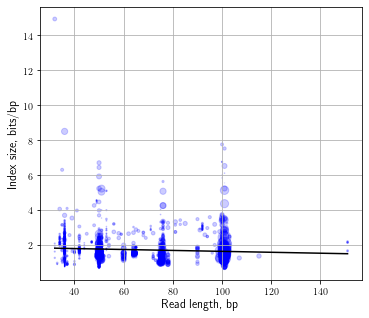

In [32]:
width = 3.487 * 1.5 * 1
height = width / 1.618 * 1.4

x = np.array(read_length[idx])
y = np.array(mtg_size[idx] * 8 / num_bp[idx])
plt.figure(figsize=(width, height))
w = num_bp[idx]
plt.scatter(x, y, color='b', alpha=0.2, s=w / w.max() * 200)
#plt.scatter(x, y, color='b', alpha=0.3)

def f(x, a, b):
    return a*x + b
(a, b), pcov2 = curve_fit(f, x, y, sigma=1/num_bp[idx], absolute_sigma=True)
plt.plot([x.min(), x.max()], [f(x.min(), a, b), f(x.max(), a, b)], 'black')

plt.ylabel('Index size, bits/bp')
plt.xlabel('Read length, bp')
plt.grid()
plt.tight_layout()
plt.savefig('size_vs_readlength.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [33]:
idx = (mtg_size > 0) & (spring_size > 0)

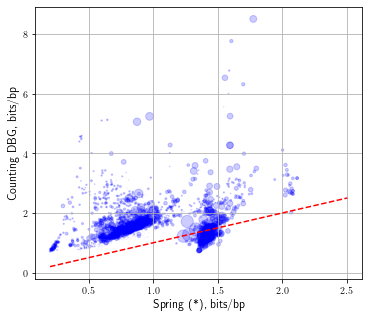

In [34]:
width = 3.487 * 1.5 * 1
height = width / 1.618 * 1.4

plt.figure(figsize=(width, height))
x = spring_size[idx] * 8 / num_bp[idx]
y = mtg_size[idx] * 8 / num_bp[idx]
w = num_bp[idx]
plt.scatter(x, y, color='b', alpha=0.2, s=w / w.max() * 200)
plt.plot([x.min(), x.max()], [x.min(), x.max()], ls="--", c='red')
plt.ylabel('Counting DBG, bits/bp')
plt.xlabel('Spring (*), bits/bp')
plt.grid()
plt.tight_layout()
plt.savefig('compression_vs_spring.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [35]:
# adapted from https://gist.github.com/jquacinella/1a6341f0f1446973714c
import weighted  # install with 'pip install wquantiles'
from matplotlib.cbook import violin_stats
from scipy import stats
from scipy.stats import gaussian_kde


def vdensity_with_weights(weights):
    ''' Outer function allows innder function access to weights. Matplotlib
    needs function to take in data and coords, so this seems like only way
    to 'pass' custom density function a set of weights '''

    def vdensity(data, coords):
        ''' Custom matplotlib weighted violin stats function '''
        # Using weights from closure, get KDE fomr statsmodels
        weighted_cost = gaussian_kde(data, weights=weights)

        # Return y-values for graph of KDE by evaluating on coords
        return weighted_cost.evaluate(coords)
    return vdensity

def custom_violin(data, weights, ax, positions=None, drop_outliers=False, **kwargs):
    results = []

    for i, (x, w) in enumerate(zip(data, weights)):
        idx = np.ones(x.shape, dtype=bool)
        if drop_outliers:
            q1 = weighted.quantile_1D(x, w, 0.25)
            q3 = weighted.quantile_1D(x, w, 0.75)
            iqr = q3 - q1  # Interquartile range
            fence_low = q1 - (1.5 * iqr)
            fence_high = q3 + (1.5 * iqr)
            idx = (x > fence_low) & (x < fence_high)

        # Use matplotlib violin_stats, which expects a function that takes in data and coords
        # which we get from closure above
        results.append(violin_stats(np.array(x)[idx], vdensity_with_weights(np.array(w)[idx].astype(float)))[0])

        # Get weighted median and mean (using weighted module for median)
        median = weighted.quantile_1D(x, w, 0.5)
        mean, sumw = np.ma.average(x, weights=w, returned=True)

        # Update result dictionary with our updated info
        results[i][u"mean"] = mean
        results[i][u"median"] = median

        # No need to do this, since it should be populated from violin_stats
        # results[i][u"min"] =  np.min(x)
        # results[i][u"max"] =  np.max(x)
        ax.scatter(x[~idx], positions[i] * np.ones(x[~idx].shape),
                   marker='o', linewidth=0.5, edgecolor='black', color='white', s=10, zorder=3)

    return ax.violin(results, positions=positions, **kwargs)

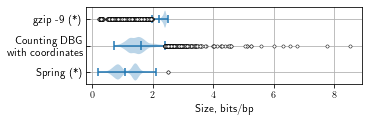

In [36]:
width = 3.487 * 1.5 * 1
height = width / 1.618 / 1.8

fig, ax = plt.subplots(figsize=(width, height))

idx = (mtg_size > 0) & (spring_size > 0)

violin_data = [
    8 * spring_size[idx] / num_bp[idx],
    8 * mtg_size[idx] / num_bp[idx],
    8 * gzip_size[idx] / num_bp[idx],
]
violin_weights = [num_bp[idx],
                  num_bp[idx],
                  num_bp[idx],]
pos = np.arange(len(violin_data)) / 1.3
custom_violin(violin_data, positions=pos, weights=violin_weights,
              vert=False, showmeans=True, ax=ax, drop_outliers=True)
#plt.violinplot(violin_data, vert=False, showmeans=True)

def set_axis_style(ax, labels):
    ax.yaxis.set_tick_params(direction='in')
    ax.yaxis.set_ticks_position('left')
    ax.set_yticks(pos)
    ax.set_yticklabels(labels, size=11)

set_axis_style(ax, ['Spring (*)',
                    'Counting DBG\nwith coordinates',
                    'gzip -9 (*)',])

#plt.axvline(1, color='black', alpha=0.5, linestyle='dashed', linewidth=2)

#plt.legend(fontsize=12)
plt.xlabel('Size, bits/bp', size=11)
plt.grid()
plt.tight_layout()
#plt.xlim([0, 15])
plt.savefig('compression_violin.pdf', format='pdf', bbox_inches='tight')
plt.show()

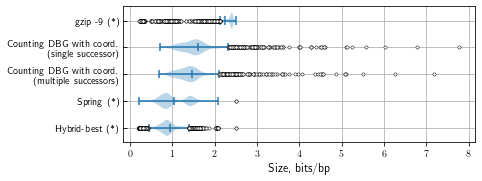

In [37]:
width = 3.487 * 1.5 * 1.3
height = width / 1.618 / 1.6

fig, ax = plt.subplots(figsize=(width, height))

idx = (mtg_size > 0) & (spring_size > 0) & (mtg2_size > 0)

hybrid_size = spring_size.copy()
hybrid_size[hybrid_size > mtg2_size] = mtg2_size[hybrid_size > mtg2_size]

violin_data = [8 * hybrid_size[idx] / num_bp[idx],
               8 * spring_size[idx] / num_bp[idx],
               8 * mtg2_size[idx] / num_bp[idx],
               8 * mtg_size[idx] / num_bp[idx],
               8 * gzip_size[idx] / num_bp[idx],]
labels = ['Hybrid-best (*)',
          'Spring (*)',
          'Counting DBG with coord.\n(multiple successors)',
          'Counting DBG with coord.\n(single successor)',
          'gzip -9 (*)',]
violin_weights = [num_bp[idx]] * len(labels)
pos = np.arange(len(violin_data)) / 1.2
custom_violin(violin_data, positions=pos, weights=violin_weights,
              vert=False, showmeans=True, ax=ax, drop_outliers=True)
#plt.violinplot(violin_data, vert=False, showmeans=True)

ax.yaxis.set_tick_params(direction='in')
ax.yaxis.set_ticks_position('left')
ax.set_yticks(pos)
ax.set_yticklabels(labels)

#plt.axvline(1, color='black', alpha=0.5, linestyle='dashed', linewidth=2)

#plt.legend(fontsize=12)
plt.xlabel('Size, bits/bp')
plt.grid()
plt.tight_layout()
#plt.xlim([0, 15])
plt.savefig('compression_violin_extended.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [38]:
(np.array(violin_data) * np.array(violin_weights)).sum(1) / np.array(violin_weights).sum(1)

array([0.95054563, 1.02731738, 1.46200161, 1.6008877 , 2.24009837])

## Dependency on k-mer length

In [39]:
DIR = !echo $PWD
DIR = f'{DIR[0]}/metagenome/data/coordinates_K'

ks = !ls $DIR
ks = [16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52]
ks = ks[1:]
ks

[19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52]

SRR805801 #1f77b4
SRR3747284 #ff7f0e
SRR13577847 #2ca02c


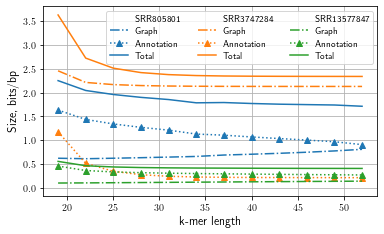

In [40]:
width = 3.487 * 1.56 * 1
height = width / 1.618

fig = plt.figure(figsize=(width, height))

files = [
    'SRR805801_no_header.fasta.gz',
    'm64011_181218_235052.fastq.gz',
    'SRR3747284_subreads.fastq.gz',
#    'SRR3747411_subreads.fastq.gz',
    'SRR386922_subreads.fastq.gz',
#    'SRR4063132_subreads.fastq.gz',
#    'SRR4235456_subreads.fastq.gz',
#    'SRR11304401_subreads.fastq.gz',
#    'SRR13684276.fastq.gz',
    'SRR13577847_subreads.fastq.gz'
]

for ID in files:
    total_size = []
    graph_size = []
    annotation_size = []
    FILE = f'{DIR}/data/{ID[:-3]}_no_header.fasta.gz'
    gzip_size = get_size(FILE)
    #!zcat {FILE} | paste - - | cut -f2 | tr -d '\n' | wc -c > {FILE}.num_bp
    num_bp = !cat {FILE}.num_bp
    num_bp = int(num_bp[0])
    for k in ks:
        g = get_size(f'{DIR}/{k}/{ID}/graph_small.dbg')
        g += get_size(f'{DIR}/{k}/{ID}/graph.dbg.rd_succ')
        g += get_size(f'{DIR}/{k}/{ID}/graph.dbg.anchors')
        column_fname = f'{DIR}/{k}/{ID}/rd_columns/annotation.column.annodbg'
        coords_fname = f'{DIR}/{k}/{ID}/rd_columns/annotation.column.annodbg.coords'
        graph_size.append(g)
        annotation_size.append(get_size(column_fname) + get_size(coords_fname))
        total_size.append(graph_size[-1] + annotation_size[-1])

    if np.isnan(np.array(total_size)).sum():
        continue

    p = plt.plot(ks, np.array(graph_size) * 8 / num_bp, label=f"{ID.split('_')[0]}: Graph", linestyle='-.', marker='')
    plt.plot(ks, np.array(annotation_size) * 8 / num_bp, label=f"{ID.split('_')[0]}: Annotation", linestyle=':', marker='^', color=p[0].get_color())
    plt.plot(ks, np.array(total_size) * 8 / num_bp, label=f"{ID.split('_')[0]}: Total", color=p[0].get_color())
    print(ID.split('_')[0], p[0].get_color())

ax = fig.axes[0]
x_lim = ax.get_xlim()

ax.set_xlim(x_lim)

plt.xlabel('k-mer length')
plt.ylabel('Size, bits/bp')
plt.grid()

ds = [2]
dc = [2.2]
asim = [2.1]
ac = [2.1]

categories = ['Graph', 'Annotation', 'Total']

p11, = plt.plot([1], '-.', color='#1f77b4')
p12, = plt.plot([1.2], ':^', color='#1f77b4')
p13, = plt.plot([1.1], '-', color='#1f77b4')
p21, = plt.plot([1], '-.', color='#ff7f0e')
p22, = plt.plot([1.2], ':^', color='#ff7f0e')
p23, = plt.plot([1.1], '-', color='#ff7f0e')
p31, = plt.plot([1], '-.', color='#2ca02c')
p32, = plt.plot([1.2], ':^', color='#2ca02c')
p33, = plt.plot([1.1], '-', color='#2ca02c')
p1, = plt.plot([0], marker='None', linestyle='None')
p2, = plt.plot([0],  marker='None', linestyle='None')
p3, = plt.plot([0],  marker='None', linestyle='None')

leg3 = plt.legend([p1, p11, p12, p13, p2, p21, p22, p23, p3, p31, p32, p33],
              ['SRR805801'] + categories + ['SRR3747284'] + categories + ['SRR13577847'] + categories,
              loc='best', ncol=3, fontsize=9) # Two columns, vertical group labels

plt.tight_layout()
plt.savefig('size_vs_k.pdf', format='pdf', bbox_inches='tight')
plt.show()